<a href="https://colab.research.google.com/github/MarioMouse826/Computer-Vision-CSGA-2771-/blob/main/DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compressing images with Discrete Cosine Basis

In [1]:
%matplotlib inline
import numpy as np
import scipy.fftpack
import scipy.misc
import matplotlib.pyplot as plt
plt.gray()

/tmp/ipython-input-2723599398.py:4: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  import scipy.misc


<Figure size 640x480 with 0 Axes>

In [2]:
# Two auxiliary functions that we will use. You do not need to read them (but make sure to run this cell!)

def dct(n):
    return scipy.fftpack.dct(np.eye(n), norm='ortho')

def plot_vector(v, color='k'):
    plt.plot(v,linestyle='', marker='o',color=color)

## 5.3.1 The canonical basis

The vectors of the canonical basis are the columns of the identity matrix in dimension $n$. We plot their coordinates below for $n=8$.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


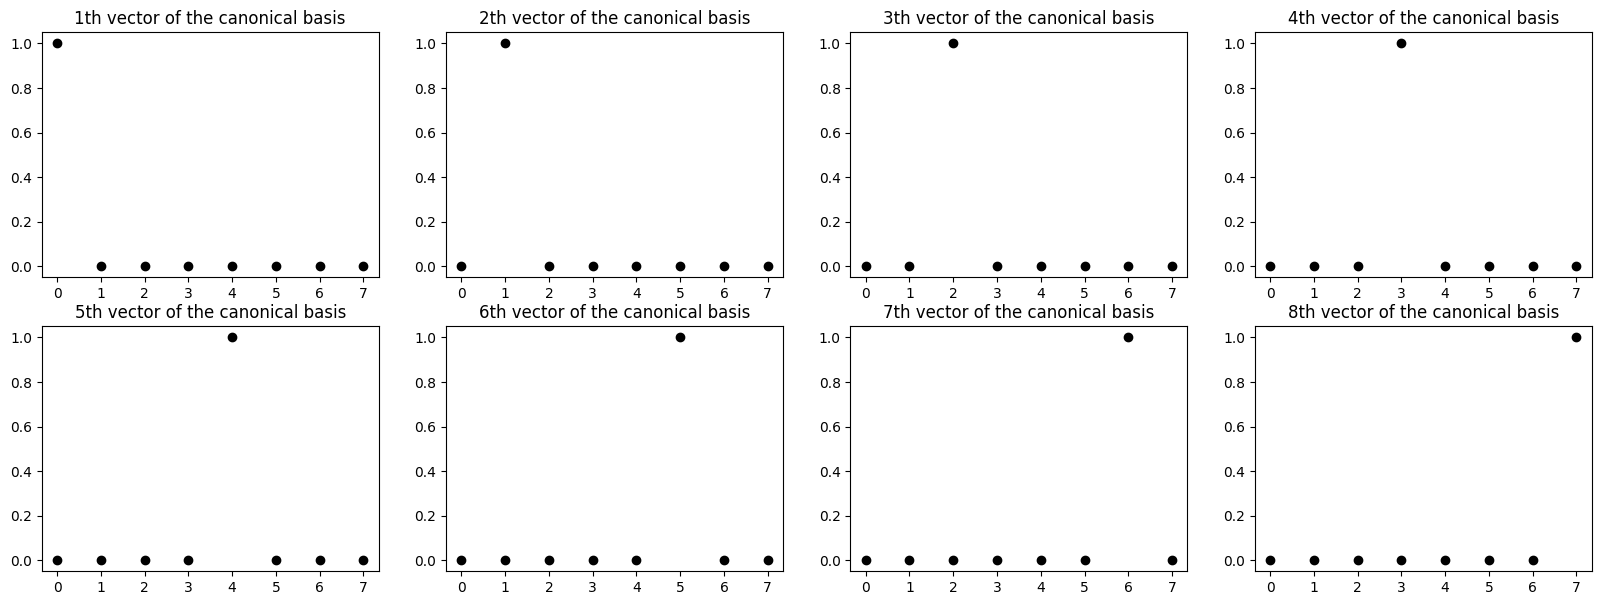

In [3]:
identity = np.identity(8)
print(identity)

plt.figure(figsize=(20,7))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"{i+1}th vector of the canonical basis")
    plot_vector(identity[:,i])

## 5.3.2 Discrete Cosine basis

The discrete cosine basis is another basis of $\mathbb{R}^n$. The function `dct(n)` outputs a square matrix of dimension $n$ whose columns are the vectors of the discrete cosine basis.

[[ 0.354  0.49   0.462  0.416  0.354  0.278  0.191  0.098]
 [ 0.354  0.416  0.191 -0.098 -0.354 -0.49  -0.462 -0.278]
 [ 0.354  0.278 -0.191 -0.49  -0.354  0.098  0.462  0.416]
 [ 0.354  0.098 -0.462 -0.278  0.354  0.416 -0.191 -0.49 ]
 [ 0.354 -0.098 -0.462  0.278  0.354 -0.416 -0.191  0.49 ]
 [ 0.354 -0.278 -0.191  0.49  -0.354 -0.098  0.462 -0.416]
 [ 0.354 -0.416  0.191  0.098 -0.354  0.49  -0.462  0.278]
 [ 0.354 -0.49   0.462 -0.416  0.354 -0.278  0.191 -0.098]]


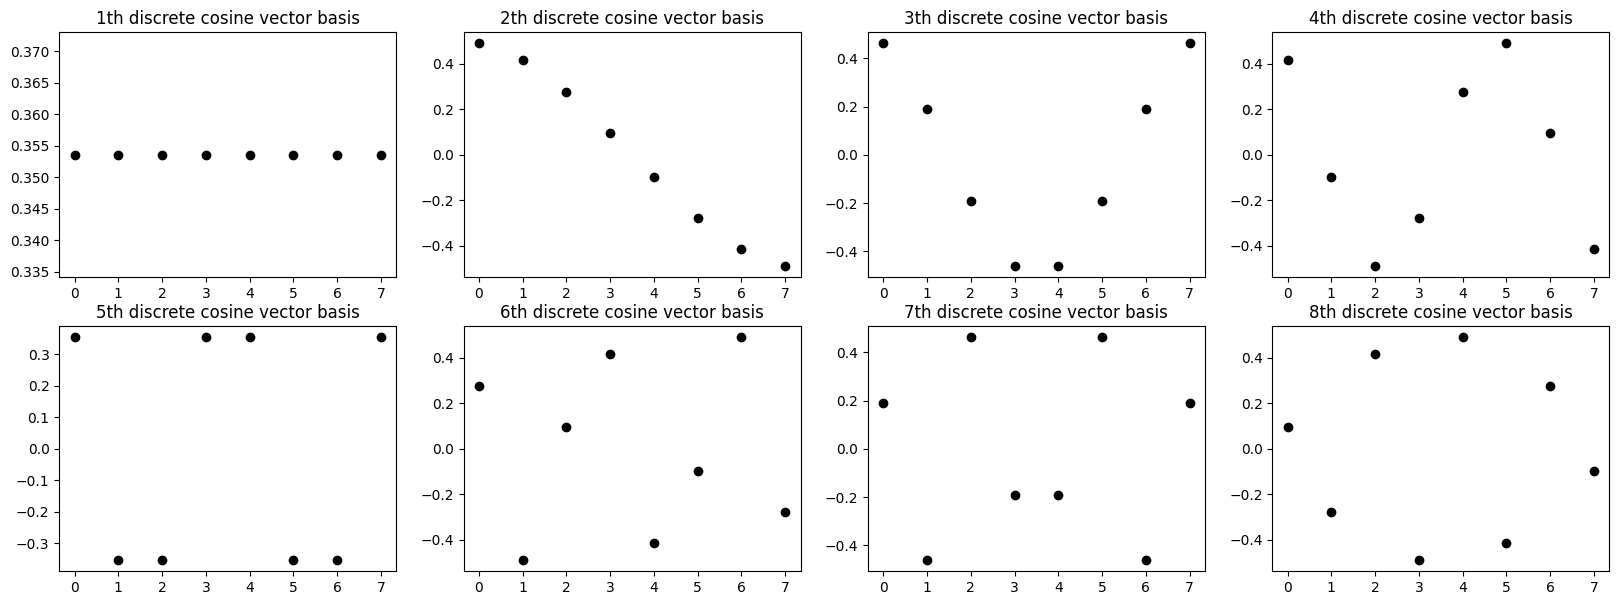

In [4]:
# Discrete Cosine Transform matrix in dimension n = 8
D8 = dct(8)
print(np.round(D8,3))

plt.figure(figsize=(20,7))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"{i+1}th discrete cosine vector basis")
    plot_vector(D8[:,i])

**5.3 (a)** Check numerically (in one line of code) that the columns of `D8` are an orthonormal basis of $\mathbb{R}^8$ (ie verify that the discrete cosine basis is an orthonormal basis).

In [5]:
# Your answer here
np.allclose(D8.T @ D8, np.eye(8))

True

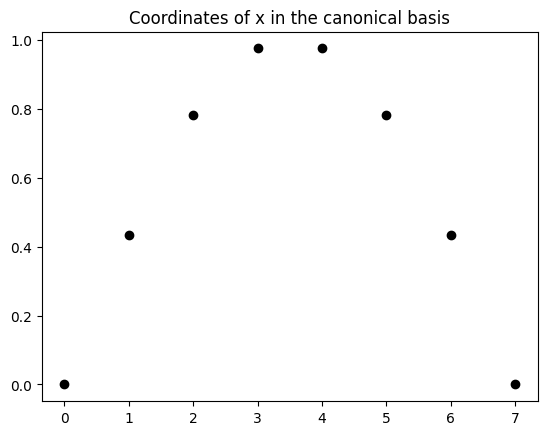

In [6]:
# Let consider the following vector x
x = np.sin(np.linspace(0,np.pi,8))
plt.title('Coordinates of x in the canonical basis')
plot_vector(x)

**5.3 (b)** Compute the vector $v \in \mathbb{R}^8$ of DCT coefficients of $x$. (1 line of code!), and plot them.

How can we obtain back $x$ from $v$ ? (1 line of code!).

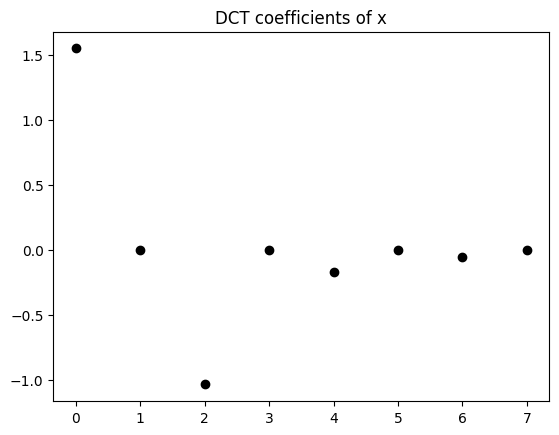

In [7]:
# Write your answer here
# First, define the vector x (from the problem)
x = np.sin(np.linspace(0, np.pi, 8))

# Compute DCT coefficients (1 line)
v = D8.T @ x

# Plot them
plt.figure()
plt.title('DCT coefficients of x')
plot_vector(v)

# Reconstruct x from v (1 line)
x_reconstructed = D8 @ v

## 5.3.3 Image compression
In this section, we will use DCT modes to compress images. Let's use one of the template images of scipy.

Height: 768, Width: 1024


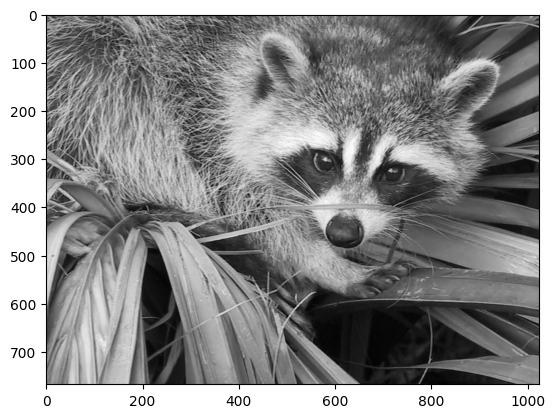

In [11]:
image = scipy.datasets.face(gray=True)
h,w = image.shape
print(f'Height: {h}, Width: {w}')

plt.imshow(image)

**5.3 (c)** We will see each column of pixels as a vector in $\mathbb{R}^{768}$, and compute their coordinates in the DCT basis of $\mathbb{R}^{768}$. Plot the entries of `x`, the first column of our image.

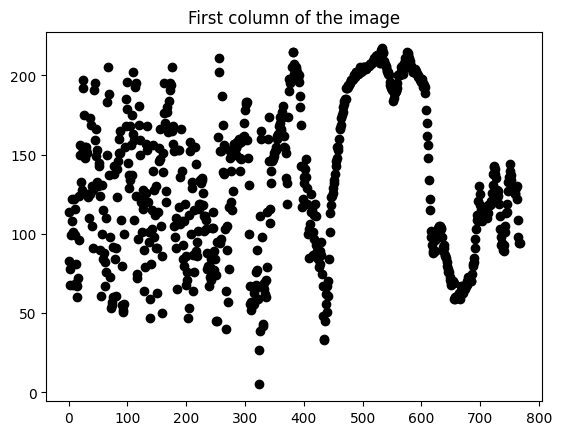

In [14]:
# Your answer here
phi = image[:, 0] #First column of the image
plt.figure()
plt.title('First column of the image')
plot_vector(phi)

**5.3 (d)** Compute the 768 x 1024 matrix `dct_coeffs` whose columns are the DCT coefficients of the columns of `image`. Plot a histogram of their magnitudes using `plt.hist`.

Text(0, 0.5, 'Frequncy')

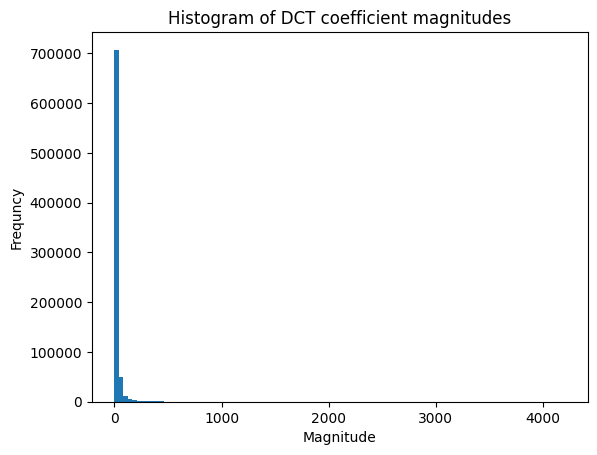

In [15]:
# Your answer here
#Create DCT basis for R^768
D768=dct(768)

#Compute DCT coefficients of all columns
dct_coeffs=D768.T@image

#Plot histogram of magnitudes
plt.figure()
plt.hist(np.abs(dct_coeffs).flatten(), bins=100)
plt.title('Histogram of DCT coefficient magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequncy')

Since a large fraction of the DCT coefficients seems to be negligible, we see that the vector `x` can be well approximated by a linear combination of a small number of discrete cosines vectors.

Hence, we can "compress" the image by only storing the few DCT coefficients with the largest magnitude.

For instance, to reduce the size by $98\%$, we store only the top $2\%$ largest (in absolute value) coefficients of `dct_coeffs`.

**5.3 (e)** Compute a matrix `thres_coeffs` which is the matrix `dct_coeffs` where about $98\%$ smallest entries have been put to 0.

In [16]:
# Your answer here
# Flatten the coefficients and find threshold for top 2%
all_coeffs = np.abs(dct_coeffs).flatten()
threshold = np.percentile(all_coeffs, 98)  # Keep top 2%

# Create thresholded coefficients matrix
thres_coeffs = dct_coeffs.copy()
thres_coeffs[np.abs(thres_coeffs) < threshold] = 0

# Calculate actual compression ratio
original_nonzero = np.prod(dct_coeffs.shape)
compressed_nonzero = np.count_nonzero(thres_coeffs)
compression_ratio = original_nonzero / compressed_nonzero
print(f"Compression ratio: {compression_ratio:.2f}:1")
print(f"Keeping {compressed_nonzero} out of {original_nonzero} coefficients")

Compression ratio: 50.00:1
Keeping 15729 out of 786432 coefficients


**5.3 (f)** Compute and plot the `compressed_image` corresponding to `thres_coeffs`.

PSNR: 20.69 dB


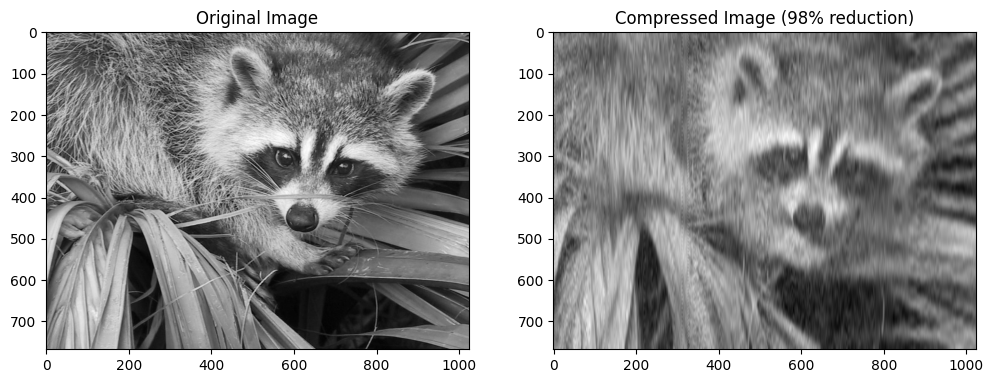

In [17]:
# Your answer here
# Reconstruct image from thresholded coefficients
compressed_image = D768 @ thres_coeffs

# Plot compressed image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title('Compressed Image (98% reduction)')

# Calculate PSNR to measure quality
mse = np.mean((image - compressed_image) ** 2)
psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')
print(f"PSNR: {psnr:.2f} dB")